In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from scipy import stats

import seaborn as sns

In [2]:
# Read Hpv data
file_address = '../Data/NassauCountyHPV.csv'

df_hpv_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyHPV.csv'

df_hpv_suffolk = pd.read_csv(file_address)

# Read TDAP data
file_address = '../Data/NassauCountyTDAP.csv'

df_tdap_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyTDAP.csv'

df_tdap_suffolk = pd.read_csv(file_address)


file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [3]:
file_address = '../Data/Ageout_hpv.csv'

df_age_hpv = pd.read_csv(file_address)


file_address = '../Data/Ageout_total.csv'

df_age_total = pd.read_csv(file_address)

In [4]:
# Clean Data , drop N/A zipcode
df_hpv_nassau.dropna(subset=['PatientZip'], inplace=True)
df_hpv_suffolk.dropna(subset=['PatientZip'], inplace=True)
df_tdap_nassau.dropna(subset=['PatientZip'], inplace=True)
df_tdap_suffolk.dropna(subset=['PatientZip'], inplace=True)


zips = np.array(df_zipcode['zip'])
# Clean Data, drop zipcode not on the Long Island
df_hpv_nassau = df_hpv_nassau[df_hpv_nassau['PatientZip'].isin(zips)]
df_hpv_suffolk = df_hpv_suffolk[df_hpv_suffolk['PatientZip'].isin(zips)]
df_tdap_nassau = df_tdap_nassau[df_tdap_nassau['PatientZip'].isin(zips)]
df_tdap_suffolk = df_tdap_suffolk[df_tdap_suffolk['PatientZip'].isin(zips)]

df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])

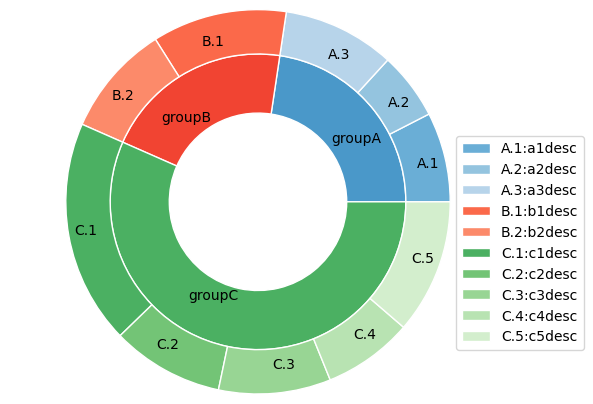

In [13]:


# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 
'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3-0.3, labels=group_names, labeldistance=0.65,colors= 
[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.4, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3, 
labels=subgroup_names, labeldistance=0.85, colors=[a(0.5), a(0.4), 
a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.margins(0,0)

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[3:], subgroup_names_legs, loc=(0.9, 0.1))
plt.show()


## TASK 1:  Split the dataset into 3 parts.   
1. No hpv vaccine.   
2. first dose before <15.   
3. first dose after >= 15   
### Those populations are based on all the patients from the whole datasets no matther which years.

In [198]:
has_empty=df_age_total['2021'].isna().any()
print('total populations until 2021 is',len(df_age_total),',has nan?',has_empty)

total populations until 2021 is 888277 ,has nan? False


In [8]:
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])

In [9]:
# df_tdap = df_tdap.sort_values(by='vax_year',ascending=True)
df_hpv = df_hpv.sort_values(by=['vax_year','vax_month'],ascending=True)
# df=df.sort_values(by='vax_year',ascending=True)
df_hpv_distinct = df_hpv.drop_duplicates(subset = ['client_id'],keep='first')

In [205]:
df_filter_hpv= df_hpv_distinct[df_hpv_distinct['PatientAge']<15]


In [207]:
print('The number of populations received first hpv dose after Age 15:',len(df_hpv_distinct) - len(df_filter_hpv))
print('The number of populations received first hpv dose before Age 15:',len(df_filter_hpv))
print('The number of populations didn\'t receive hpv dose:',len(df_age_total) - len(df_hpv_distinct))

The number of populations received first hpv dose after Age 15: 138226
The number of populations received first hpv dose before Age 15: 272552
The number of populations didn't receive hpv dose: 477499


Text(0.5, 1.0, 'Distribution of Hpv First dose Age')

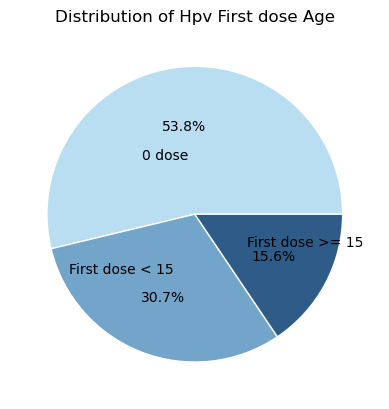

In [208]:
# 11-13 age group
labels = ["0 dose", "First dose < 15", "First dose >= 15"]
value = [len(df_age_total) - len(df_hpv_distinct),len(df_filter_hpv),len(df_hpv_distinct) - len(df_filter_hpv)]
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.4,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Hpv First dose Age')
# plt.show() 

## TASK 2: See the Distribution of Completeness in each Age Group  
1. The age group is divided to < 15 and >= 15 groups  
2. We can tell how many kids receive the complete serious of hpv vaccine

In [209]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
group

,count,c
0,1,49312
1,2,163939
2,3,59301


[49312, 163939, 59301]


Text(0.5, 1.0, 'Distribution of Age < 15 kids Hpv Vaccine Completeness')

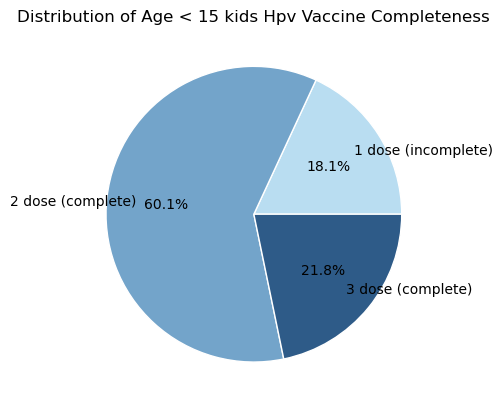

In [210]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
# group



labels = ["1 dose (incomplete)", "2 dose (complete)", "3 dose (complete)"]
value = list(group['c'])
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.8,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age < 15 kids Hpv Vaccine Completeness')
# plt.show() 

[38598, 37043, 64956]


Text(0.5, 1.0, 'Distribution of Age >= 15 populations Hpv Vaccine Completeness')

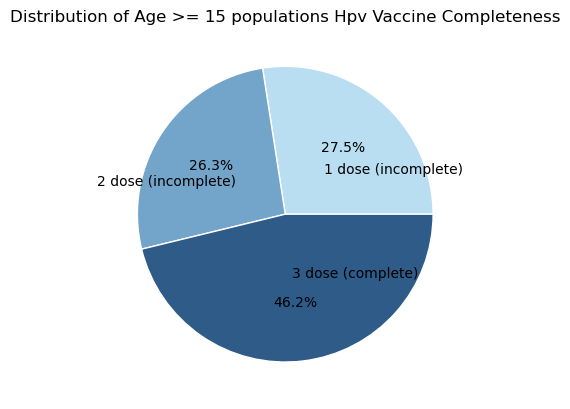

In [75]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']>=15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')



labels = ["1 dose (incomplete)", "2 dose (incomplete)", "3 dose (complete)"]
value = list(group['c'])
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.4,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age >= 15 populations Hpv Vaccine Completeness')
# plt.show() 

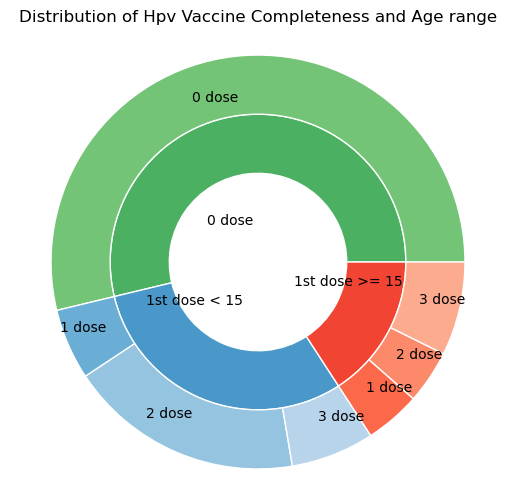

In [211]:


# Make data: I have 3 groups and 7 subgroups
group_names=["0 dose", "1st dose < 15", "1st dose >= 15"]
group_size=[477499, 270181, 140597]
subgroup_names=['0 dose','1 dose', '2 dose', '3 dose', '1 dose', '2 dose', '3 dose']
subgroup_size=[477499,49312, 163025, 57844,38598, 37043, 64956]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.4-0.4, labels=group_names, labeldistance=0.28,colors= 
[c(0.6), a(0.6), b(0.6)] )
plt.setp( mypie, width=0.4, edgecolor='white')

# Second Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.4, 
labels=subgroup_names, labeldistance=0.8, colors=[c(0.5),a(0.5), a(0.4), 
a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

# plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

plt.title('Distribution of Hpv Vaccine Completeness and Age range',pad=40)
# plt.subplots_adjust(top=0.9) 

# ax.legend(handles[3:], subgroup_names_legs, loc=(0.9, 0.1))
plt.show()


## TASK3 Analysis the gap between each dose.

In [11]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

patients_u14 = df_hpv[df_hpv['client_id'].isin(clients)]

# grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')
# grouped

# group = grouped.groupby(['count']).size().reset_index(name='c')

In [222]:
grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

In [157]:
def SplitClientsByNumberOfDose(patients):
    lst_of_df = []
    grouped = patients.groupby(['client_id']).size().reset_index(name='count')
    print(grouped['count'].unique())
    numbers = list(grouped['count'].unique())
    lst_of_df.append(numbers)
    for number in numbers:
        clients = np.array(grouped[grouped['count']==number]['client_id'])
        clients = set(clients)
        lst_of_df.append(patients[patients['client_id'].isin(clients)]
                         .sort_values(by=['client_id','vax_year','vax_month'],ascending=True).reset_index())
    return lst_of_df,grouped


In [13]:
res,gp = SplitClientsByNumberOfDose(patients_u14)

[3 2 1]


In [17]:
print(len(res[0]),len(res[1]),len(res[2]),len(res[3]))

3 177903 327878 49312


In [167]:
df = res[2]
df

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
141766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47134,2759913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93584,3029209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
118244,4238267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83792,2924580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118245,4238267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15413,2045008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# calculate gaps
df = res[2]
def calculateGaps(df,doses):
    gaps = []
    ages = []
    for i in range(0,len(df),doses):
    #     print(df['vax_year'][i+1])
        gap = (df['vax_year'][i+1]-df['vax_year'][i])*12 + df['vax_month'][i+1]-df['vax_month'][i]
    #     print(gap)
        ages.append(df['PatientAge'][i])
        gaps.append(gap)
    return np.array(gaps),np.array(ages)
    

In [31]:
gaps,ages = calculateGaps(res[2],2)
gaps.min()

0

In [26]:
np.median(gaps)

12.0

In [25]:
gaps.mean()

12.77633754018263

In [131]:
(patients_u14['vax_year'][2+1]-patients_u14['vax_year'][2+1]+1)*12+patients_u14['vax_month'][2+1]

17

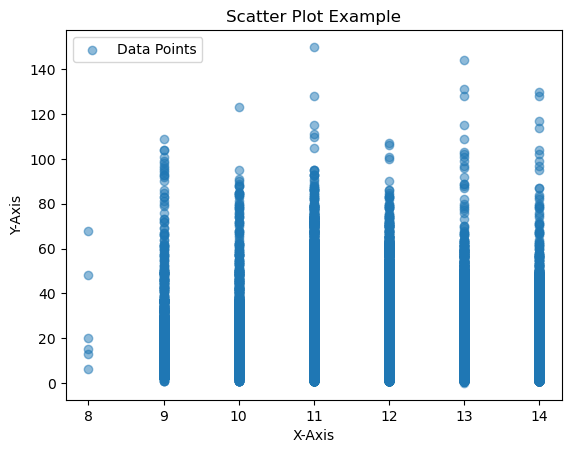

In [32]:
plt.scatter(ages, gaps, label='Data Points',alpha = 0.5)


plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Scatter Plot Example')


plt.legend()

plt.show()


In [34]:
legend_font = {"family": "Times New Roman", "size":10}
title_font = {"family": "Times New Roman", "size":15}

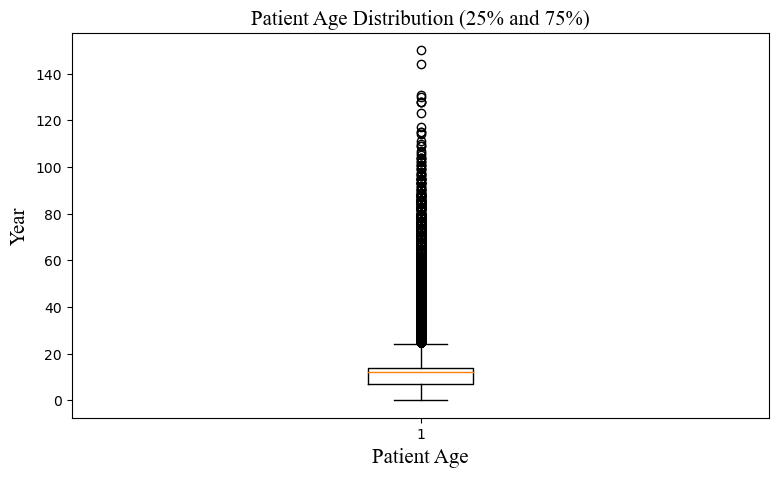

[13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 13]


In [35]:
grouped = df.groupby('vax_year').size().reset_index(name='Count')
years = list(grouped['vax_year'])

age_data_by_year = list(df.groupby('vax_year')['PatientAge'].apply(list))
len(age_data_by_year[0])

data_to_plot = age_data_by_year

plt.figure(figsize=(9, 5))
# Create multiple boxplots
plt.boxplot(gaps)



# Customize the display with title and labels
plt.title('Patient Age Distribution (25% and 75%)',fontproperties = title_font)
plt.xlabel('Patient Age',fontproperties = title_font)
plt.ylabel('Year',fontproperties = title_font)
lambda_function = lambda x: x  
# array_from_lambda = np.array([lambda_function(x) for x in range(1, 15)])
# plt.xticks(array_from_lambda, years,fontproperties = legend_font)

# Show the plot
plt.show()

res = []
for i in range(len(data_to_plot)):
    res.append(int(np.median(data_to_plot[i])))
print(res)

In [40]:
box_res[0]

[13, 68, 6, 48, 15, 20]

In [54]:
def cleanforbox(inp):
    res = []
    for lst in inp:
        data = np.array(lst)
        z_scores = np.abs(stats.zscore(data))
        threshold = 2  # 通常使用2或3作为阈值
        outlier_indices = np.where(z_scores > threshold)
        cleaned_data = data[(z_scores <= threshold)]
        res.append(cleaned_data)
    return res

Text(0, 0.5, 'Months')

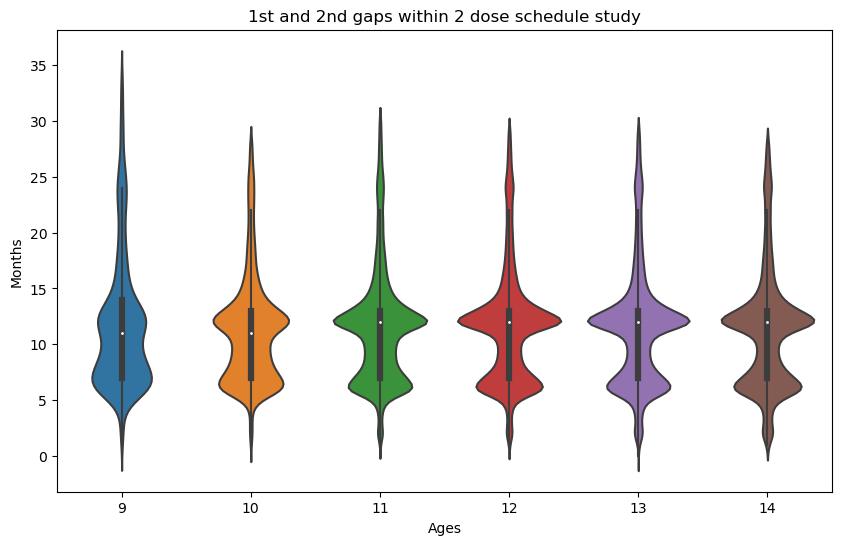

In [66]:


box_res = [[],[],[],[],[],[],[]]
for i in range(len(ages)):
    box_res[ages[i]-8].append(gaps[i])
len(box_res[0])

box_clean=cleanforbox(box_res)

plt.figure(figsize=(10, 6))
sns.violinplot(data=box_clean[1:])

xtick = np.array(list(set(ages))[1:])

# 添加标题和轴标签
plt.title('1st and 2nd gaps within 2 dose schedule study')
plt.xticks(xtick-9,xtick)
plt.xlabel('Ages')
plt.ylabel('Months')


In [69]:
len(patients_u14)

555093

In [ ]:
patients_u14()

[49312, 163939, 59301]


Text(0.5, 1.0, 'Distribution of Age < 15 kids Hpv Vaccine Completeness')

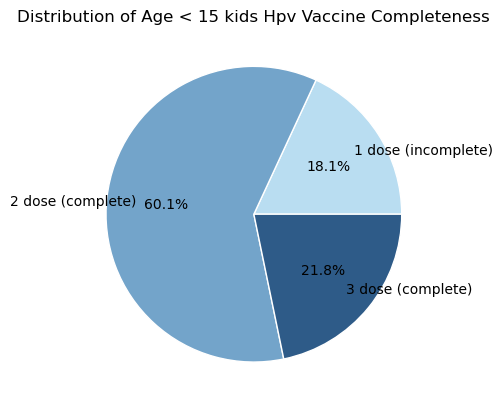

In [307]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
# group



labels = ["1 dose (incomplete)", "2 dose (complete)", "3 dose (complete)"]
value = list(group['c'])
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.8,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age < 15 kids Hpv Vaccine Completeness')
# plt.show() 

[8507, 96050, 59382]


Text(0.5, 1.0, 'Kids(under 15) Hpv Vaccine Gaps Between 1st and 2nd Dose')

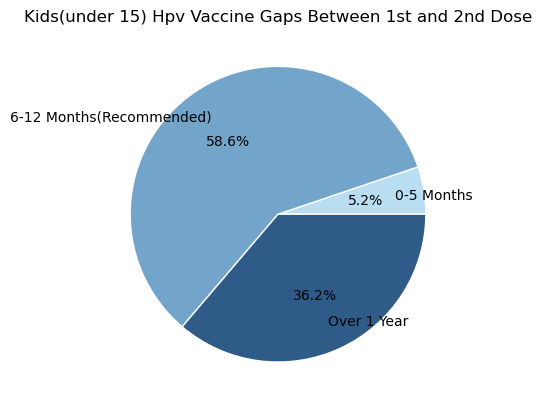

In [306]:
res=[0,0,0]
for i in gaps:
    if i <= 5:
        res[0] += 1
    elif i <= 12:
        res[1] += 1
#     elif i <= 36:
#         res[2] += 1
    else:
        res[2] +=1


labels = ["0-5 Months", "6-12 Months(Recommended)", "Over 1 Year"]
value = res
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.8,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Kids(under 15) Hpv Vaccine Gaps Between 1st and 2nd Dose')
# plt.show() 

In [70]:
patients_u14

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
139,289434,1,2008,WHITE,UNKNOWN,13,Gardasil,11803.0,Nassau,Warren,F
518,609892,1,2008,UNKNOWN,UNKNOWN,11,Gardasil,11575.0,Nassau,Nassau,F
528,609898,1,2008,OTHER,HISPANIC OR LATINO,14,Gardasil,11575.0,Nassau,Nassau,F
574,609933,1,2008,OTHER,HISPANIC OR LATINO,13,Gardasil,11553.0,Nassau,Nassau,F
575,609934,1,2008,ASIAN,HISPANIC OR LATINO,14,Gardasil,11801.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
449374,23391819,12,2021,OTHER,HISPANIC OR LATINO,12,Gardasil 9,11941.0,Suffolk,Suffolk,F
449386,23400371,12,2021,WHITE,HISPANIC OR LATINO,12,Gardasil 9,11967.0,Suffolk,Suffolk,F
449387,23406579,12,2021,OTHER,HISPANIC OR LATINO,11,Gardasil 9,11704.0,Suffolk,Suffolk,F
449393,23411001,12,2021,OTHER,HISPANIC OR LATINO,14,Gardasil 9,11784.0,Suffolk,Suffolk,F


In [ ]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']>=15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')

In [78]:
len(df_hpv_distinct)

410778

In [80]:
len(grouped['client_id'].unique())

410778

In [88]:
df_hpv_distinct = df_hpv_distinct.sort_values(by=['client_id'],ascending=True)
df_hpv_distinct=df_hpv_distinct.reset_index()
grouped = grouped.sort_values(by=['client_id'],ascending=True)
grouped = grouped.reset_index()

In [83]:
grouped = df_hpv.groupby(['client_id']).size().reset_index(name='count')
grouped

,client_id,count
0,9910,1
1,12409,2
2,21455,1
3,21656,2
4,25161,1
...,...,...
410773,23573852,2
410774,23574078,2
410775,23574745,2
410776,23577049,2


In [87]:
len(grouped['count'])

410778

In [89]:
df_hpv_distinct['Doses'] = grouped['count']

In [93]:
df_hpv_distinct['Doses'].isna().any()

False

In [94]:
df_hpv_distinct

,index,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses
0,0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1
1,1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2
2,3,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1
3,4,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2
4,6,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,449589,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2
410774,449591,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2
410775,415192,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2
410776,415194,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2


In [268]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

In [274]:
import plotly.graph_objects as go

fig = go.Figure(go.Sunburst(
    labels=["Parent", "Child 1", "Child 2", "Child 1.1", "Child 1.2", "Child 2.1"],
    parents=["", "Parent", "Parent", "Child 1", "Child 1", "Child 2"],
    values=[10, 20, 30, 40, 50, 60],
    marker=dict(
        colors=["blue", "red", "green", "yellow", "purple", "orange"],
        pattern="hourglass"  # Set the 'pattern' property for markers
    )
))

fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.sunburst.Marker: 'pattern'

Did you mean "cauto"?

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `marker.colorscale`. Has an effect only if colors is
            set to a numerical array. In case `colorscale` is
            unspecified or `autocolorscale` is true, the default
            palette will be chosen according to whether numbers in
            the `color` array are all positive, all negative or
            mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here colors) or the
            bounds set in `marker.cmin` and `marker.cmax` Has an
            effect only if colors is set to a numerical array.
            Defaults to `false` when `marker.cmin` and
            `marker.cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Has an effect
            only if colors is set to a numerical array. Value
            should have the same units as colors and if set,
            `marker.cmin` must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `marker.cmin` and/or `marker.cmax` to be equidistant to
            this point. Has an effect only if colors is set to a
            numerical array. Value should have the same units as
            colors. Has no effect when `marker.cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Has an effect
            only if colors is set to a numerical array. Value
            should have the same units as colors and if set,
            `marker.cmax` must be set as well.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.sunburst.marker.ColorBar`
            instance or dict with compatible properties
        colors
            Sets the color of each sector of this trace. If not
            specified, the default trace color set is used to pick
            the sector colors.
        colorscale
            Sets the colorscale. Has an effect only if colors is
            set to a numerical array. The colorscale must be an
            array containing arrays mapping a normalized value to
            an rgb, rgba, hex, hsl, hsv, or named color string. At
            minimum, a mapping for the lowest (0) and highest (1)
            values are required. For example, `[[0,
            'rgb(0,0,255)'], [1, 'rgb(255,0,0)']]`. To control the
            bounds of the colorscale in color space, use
            `marker.cmin` and `marker.cmax`. Alternatively,
            `colorscale` may be a palette name string of the
            following list: Blackbody,Bluered,Blues,Cividis,Earth,E
            lectric,Greens,Greys,Hot,Jet,Picnic,Portland,Rainbow,Rd
            Bu,Reds,Viridis,YlGnBu,YlOrRd.
        colorssrc
            Sets the source reference on Chart Studio Cloud for
            `colors`.
        line
            :class:`plotly.graph_objects.sunburst.marker.Line`
            instance or dict with compatible properties
        reversescale
            Reverses the color mapping if true. Has an effect only
            if colors is set to a numerical array. If true,
            `marker.cmin` will correspond to the last color in the
            array and `marker.cmax` will correspond to the first
            color.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace. Has an effect only if colors is set to a
            numerical array.
        
Did you mean "cauto"?

Bad property path:
pattern
^^^^^^^

In [105]:
import pandas as pd

# Create a dictionary with sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 22, 35, 28],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami']
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

df.set_index('Name', inplace=True)

# Display the DataFrame
df


,Age,City
Name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,22,Chicago
David,35,Houston
Eva,28,Miami


In [104]:
import pandas as pd

# Create a dictionary with sample data
data = {
    'Born': ['New York', 'Los Angeles', 'Chicago', 'Houston'],
    'Name': ['Bob', 'Charlie', 'David', 'Eva'],
#     'Age': [25, 30, 22, 35, 28],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami']
}

# Create a DataFrame from the dictionary
df1 = pd.DataFrame(data)

df1.set_index('Name', inplace=True)

# Display the DataFrame
df1

,Born
Name,
Bob,New York
Charlie,Los Angeles
David,Chicago
Eva,Houston


In [106]:
df['born']=df1['Born']

In [1]:
df

NameError: name 'df' is not defined

gap between 1-2 have several types:  
1. NaN ( they only have 1 dose, didn't have the 2 nd, so the gap will be nan)  
2. interges:  
    a. they have 2 doses: 1 and 2 gap will be the whole series  
    b. they have 3 doses: 1,2,3, and thus will be the first part of the series

gap in the whole series have several types:  
1. 0 they only have 1 doses
2. interges:  
    a. they have 2 doses: 1 and 2 gap will be the whole series  
    b. they have 3 doses: 1,2,3, and thus will be the gaps between 1 and 3

In [131]:
def calculate12Gaps(df,doses):
    gaps = []
    ages = []
    ids = []
    for i in range(0,len(df),doses):
    #     print(df['vax_year'][i+1])
        gap = (df['vax_year'][i+1]-df['vax_year'][i])*12 + df['vax_month'][i+1]-df['vax_month'][i]
    #     print(gap)
        ages.append(df['PatientAge'][i])
        gaps.append(gap)
        ids.append(df['client_id'][i])
    dct = {
        'gaps':gaps,
        'ages':ages,
        'client_id':ids
    }
    res = pd.DataFrame(dct)
    return res
    

In [122]:
def SplitClientsByNumberOfDose(patients):
    lst_of_df = []
    grouped = patients.groupby(['client_id']).size().reset_index(name='count')
    print(grouped['count'].unique())
    numbers = list(grouped['count'].unique())
    lst_of_df.append(numbers)
    for number in numbers:
        clients = np.array(grouped[grouped['count']==number]['client_id'])
        clients = set(clients)
        lst_of_df.append(patients[patients['client_id'].isin(clients)]
                         .sort_values(by=['client_id','vax_year','vax_month'],ascending=True).reset_index())
    return lst_of_df,grouped


In [137]:
len(patients_u14)

555093

In [134]:
res,gp = SplitClientsByNumberOfDose(patients_u14)

[3 2 1]


In [135]:
res[1]

,index,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
0,7,28751,12,2016,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M
1,8,28751,3,2017,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M
2,9,28751,6,2017,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M
3,1,34816,9,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11950.0,Suffolk,Tioga,M
4,2,34816,11,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil 9,11950.0,Suffolk,Tioga,M
...,...,...,...,...,...,...,...,...,...,...,...,...
177898,415150,23557548,9,2013,WHITE,NOT HISPANIC OR LATINO,14,Gardasil,11758.0,Nassau,Nassau,M
177899,415151,23557548,1,2014,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11758.0,Nassau,Nassau,M
177900,449534,23559336,6,2013,ASIAN,NOT HISPANIC OR LATINO,11,Gardasil,11755.0,Suffolk,Nassau,M
177901,449535,23559336,10,2013,ASIAN,NOT HISPANIC OR LATINO,11,Gardasil,11755.0,Suffolk,Nassau,M


In [133]:
len(res[1])

177903

In [138]:
res1 = calculate12Gaps(res[2],2)

In [139]:
res1

,gaps,ages,client_id
0,5,14,35656
1,13,11,46635
2,13,12,47959
3,51,11,54798
4,88,11,67631
...,...,...,...
163934,61,12,23573852
163935,12,14,23574078
163936,13,12,23574745
163937,6,12,23577049


In [140]:
df_hpv_distinct

,index,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses
0,0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1
1,1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2
2,3,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1
3,4,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2
4,6,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,449589,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2
410774,449591,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2
410775,415192,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2
410776,415194,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2


## add another two columns: 1st2ndgap and wholegap

In [143]:
df_hpv_distinct=df_hpv_distinct.drop('index',axis=1)

In [145]:
df_hpv

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
4,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F
6,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F
31,85387,1,2008,WHITE,NOT HISPANIC OR LATINO,16,Gardasil,11758.0,Nassau,Jefferson,F
92,240100,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11530.0,Nassau,Saratoga,F
139,289434,1,2008,WHITE,UNKNOWN,13,Gardasil,11803.0,Nassau,Warren,F
...,...,...,...,...,...,...,...,...,...,...,...
449498,23509433,12,2021,OTHER,HISPANIC OR LATINO,17,Gardasil 9,11939.0,Suffolk,Suffolk,M
449516,23537004,12,2021,OTHER,HISPANIC OR LATINO,17,Gardasil 9,11901.0,Suffolk,Suffolk,M
449517,23537126,12,2021,WHITE,HISPANIC OR LATINO,16,Gardasil 9,11746.0,Suffolk,Suffolk,M
449567,23565457,12,2021,WHITE,HISPANIC OR LATINO,15,Gardasil 9,11777.0,Suffolk,Suffolk,M


In [144]:
df_hpv_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2
2,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1
3,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2
4,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2


In [146]:
res,gp = SplitClientsByNumberOfDose(df_hpv)

[1 2 3]


In [148]:
dose2

,gaps,ages,client_id
0,3,11,28751
1,3,16,33176
2,2,13,34816
3,3,11,53770
4,20,15,66483
...,...,...,...
122795,2,14,23557548
122796,4,11,23559336
122797,2,25,23560177
122798,25,15,23562090


In [149]:
dose3 = calculate12Gaps(res[3],3)

In [150]:
dose2 = calculate12Gaps(res[2],2)

In [151]:
len(dose3)+len(dose2)+len(res[1])

410778

In [154]:
dose12 = pd.concat([dose3,dose2])

In [155]:
dose12.set_index('client_id', inplace=True)

In [157]:
df_hpv_distinct.set_index('client_id',inplace = True)

In [159]:
dose12

,gaps,ages
client_id,,
28751,3,11
33176,3,16
34816,2,13
53770,3,11
66483,20,15
...,...,...
23573852,61,12
23574078,12,14
23574745,13,12


In [160]:
df_hpv_distinct['dose12gap'] = dose12['gaps']

In [161]:
df_hpv_distinct

,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap
client_id,,,,,,,,,,,,
9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1,NaN
12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2,2.0
21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1,NaN
21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2,4.0
25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0
23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0
23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0


In [162]:
df_hpv_distinct.reset_index(inplace=True)

In [163]:
df_hpv_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1,NaN
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2,2.0
2,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1,NaN
3,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2,4.0
4,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0


In [164]:
def calculate13Gaps(df,doses):
    gaps = []
    ages = []
    ids = []
    for i in range(0,len(df),doses):
    #     print(df['vax_year'][i+1])
        gap = (df['vax_year'][i+2]-df['vax_year'][i])*12 + df['vax_month'][i+2]-df['vax_month'][i]
    #     print(gap)
        ages.append(df['PatientAge'][i])
        gaps.append(gap)
        ids.append(df['client_id'][i])
    dct = {
        'gaps':gaps,
        'ages':ages,
        'client_id':ids
    }
    res = pd.DataFrame(dct)
    return res
    

In [165]:
dose3w = calculate13Gaps(res[3],3)

In [166]:
dose3w

,gaps,ages,client_id
0,6,11,28751
1,6,16,33176
2,8,13,34816
3,6,11,53770
4,29,15,66483
...,...,...,...
122795,6,14,23557548
122796,14,11,23559336
122797,19,25,23560177
122798,37,15,23562090


In [167]:
dosewhole = pd.concat([dose2,dose3w])

In [168]:
df_hpv_distinct.set_index('client_id',inplace = True)
dosewhole.set_index('client_id',inplace = True)

In [169]:
df_hpv_distinct['wholeSeriesGap'] = dosewhole['gaps']

In [170]:
df_hpv_distinct.reset_index(inplace=True)

In [171]:
df_hpv_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1,NaN,NaN
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2,2.0,2.0
2,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1,NaN,NaN
3,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2,4.0,4.0
4,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0,12.0
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0


In [172]:
df_hpv_distinct[df_hpv_distinct['Doses'] == 3]

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
5,28751,12,2016,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M,3,3.0,6.0
6,33176,9,2017,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,16,Gardasil,11510.0,Nassau,Nassau,F,3,3.0,6.0
7,34816,9,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11950.0,Suffolk,Tioga,M,3,2.0,8.0
16,53770,9,2008,UNKNOWN,UNKNOWN,11,Gardasil,11722.0,Suffolk,Suffolk,F,3,3.0,6.0
18,66483,2,2017,WHITE,NOT HISPANIC OR LATINO,15,Gardasil 9,11572.0,Nassau,Nassau,F,3,20.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410711,23557548,7,2013,WHITE,NOT HISPANIC OR LATINO,14,Gardasil,11758.0,Nassau,Nassau,M,3,2.0,6.0
410718,23559336,6,2013,ASIAN,NOT HISPANIC OR LATINO,11,Gardasil,11755.0,Suffolk,Nassau,M,3,4.0,14.0
410722,23560177,5,2019,WHITE,NOT HISPANIC OR LATINO,25,Gardasil 9,11040.0,Nassau,Nassau,F,3,2.0,19.0
410733,23562090,8,2018,OTHER,NOT HISPANIC OR LATINO,15,Gardasil 9,11720.0,Suffolk,Suffolk,F,3,25.0,37.0


In [173]:
df_hpv_distinct.to_csv('../Data/distinct_hpv_patients.csv', index=False)

## Start new line

In [4]:
df_hpv_distinct = pd.read_csv('../Data/distinct_hpv_patients.csv')

In [5]:
df_hpv_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
0,9910,7,2017,WHITE,NOT HISPANIC OR LATINO,24,Gardasil 9,11756.0,Nassau,Nassau,M,1,NaN,NaN
1,12409,6,2019,OTHER,NOT HISPANIC OR LATINO,22,Gardasil,11590.0,Nassau,Nassau,M,2,2.0,2.0
2,21455,1,2013,ASIAN,NOT HISPANIC OR LATINO,17,Gardasil,11040.0,Nassau,New York,M,1,NaN,NaN
3,21656,1,2008,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,15,Gardasil,11520.0,Nassau,Broome,F,2,4.0,4.0
4,25161,1,2008,WHITE,NOT HISPANIC OR LATINO,15,Gardasil,11561.0,Nassau,Cayuga,F,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0,12.0
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0


In [6]:
df_hpv_distinct[df_hpv_distinct['Doses'] == 3]

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
5,28751,12,2016,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M,3,3.0,6.0
6,33176,9,2017,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,16,Gardasil,11510.0,Nassau,Nassau,F,3,3.0,6.0
7,34816,9,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11950.0,Suffolk,Tioga,M,3,2.0,8.0
16,53770,9,2008,UNKNOWN,UNKNOWN,11,Gardasil,11722.0,Suffolk,Suffolk,F,3,3.0,6.0
18,66483,2,2017,WHITE,NOT HISPANIC OR LATINO,15,Gardasil 9,11572.0,Nassau,Nassau,F,3,20.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410711,23557548,7,2013,WHITE,NOT HISPANIC OR LATINO,14,Gardasil,11758.0,Nassau,Nassau,M,3,2.0,6.0
410718,23559336,6,2013,ASIAN,NOT HISPANIC OR LATINO,11,Gardasil,11755.0,Suffolk,Nassau,M,3,4.0,14.0
410722,23560177,5,2019,WHITE,NOT HISPANIC OR LATINO,25,Gardasil 9,11040.0,Nassau,Nassau,F,3,2.0,19.0
410733,23562090,8,2018,OTHER,NOT HISPANIC OR LATINO,15,Gardasil 9,11720.0,Suffolk,Suffolk,F,3,25.0,37.0


In [12]:
df_u14_distinct_3_dose = df_hpv_distinct[df_hpv_distinct['PatientAge'] <= 14]

In [13]:
df_u14_distinct_3_dose = df_u14_distinct_3_dose[df_u14_distinct_3_dose['Doses']==3]

In [16]:
gaps = np.array(df_u14_distinct_3_dose['dose12gap'])
ages = np.array(df_u14_distinct_3_dose['PatientAge'])
ages

array([11, 13, 11, ..., 14, 14, 11])

In [18]:
set(ages)

{8, 9, 10, 11, 12, 13, 14}

Text(0, 0.5, 'Months')

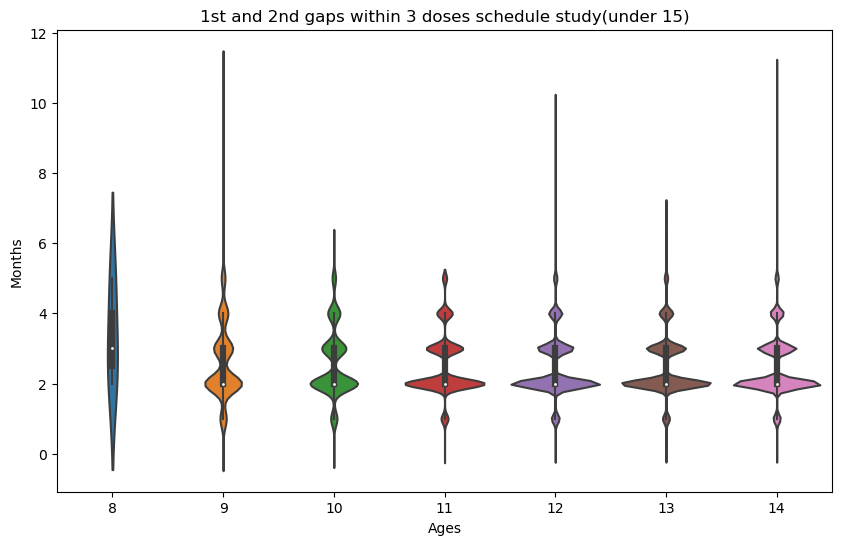

In [26]:


box_res = [[],[],[],[],[],[],[]]
for i in range(len(ages)):
    box_res[ages[i]-8].append(gaps[i])
len(box_res[0])

# box_clean=cleanforbox(box_res)
box_clean = box_res

plt.figure(figsize=(10, 6))
sns.violinplot(data=box_clean)

xtick = np.array(list(set(ages)))

# 添加标题和轴标签
plt.title('1st and 2nd gaps within 3 doses schedule study(under 15)')
plt.xticks(xtick-8,xtick)
plt.xlabel('Ages')
plt.ylabel('Months')

In [42]:

grouped = df_hpv_distinct.groupby(['client_id']).size().reset_index(name='count')

In [43]:
grouped = df_913_distinct.groupby(['vax_year']).size().reset_index(name='count')

In [44]:
grouped

,vax_year,count
0,2008,7081
1,2009,3703
2,2010,4999
3,2011,6763
4,2012,9249
5,2013,13627
6,2014,15146
7,2015,20359
8,2016,22865
9,2017,23084


Text(0.5, 1.0, 'Absolute Number of Vaccined Patients(9-13) in Each Year')

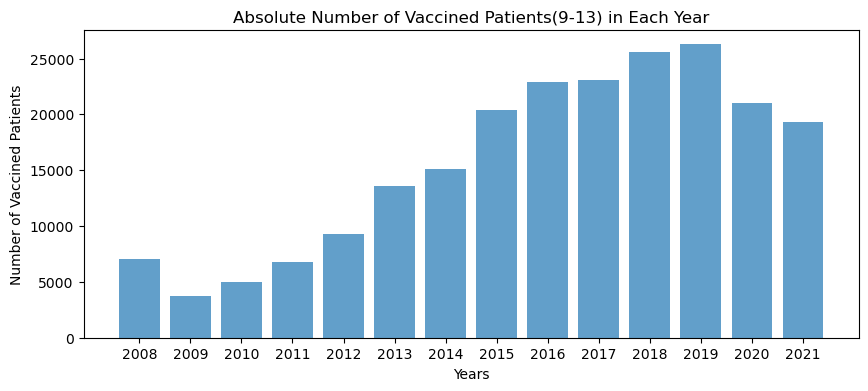

In [134]:
df_913_distinct = df_hpv_distinct[df_hpv_distinct['PatientAge'] <= 13]
df_913_distinct = df_913_distinct[df_913_distinct['PatientAge']>=9]

grouped = df_913_distinct.groupby(['vax_year']).size().reset_index(name='count')

plt.figure(figsize = (10,4))
plt.bar(grouped['vax_year'],grouped['count'],alpha = 0.7)

plt.xticks(grouped['vax_year'])
plt.xlabel('Years')
plt.ylabel('Number of Vaccined Patients')

plt.title('Absolute Number of Vaccined Patients(9-13) in Each Year')

In [120]:
df_913_distinct = df_hpv_distinct[df_hpv_distinct['PatientAge'] <= 13]
df_913_distinct = df_913_distinct[df_913_distinct['PatientAge']>=9]
df_913_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
5,28751,12,2016,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M,3,3.0,6.0
7,34816,9,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11950.0,Suffolk,Tioga,M,3,2.0,8.0
10,35786,8,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11010.0,Nassau,Chenango,F,1,NaN,NaN
13,46635,6,2009,WHITE,NOT HISPANIC OR LATINO,11,Gardasil,11967.0,Suffolk,Chautauqua,F,2,13.0,13.0
14,47959,9,2008,OTHER,UNKNOWN,12,Gardasil,11717.0,Suffolk,New York,F,2,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410772,23573786,1,2021,UNKNOWN,HISPANIC OR LATINO,12,Gardasil 9,11727.0,Suffolk,Suffolk,M,1,NaN,NaN
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0


In [129]:
df_913_distinct = df_913_distinct.drop(df_913_distinct[df_913_distinct['GENDER'] == 'U'].index)

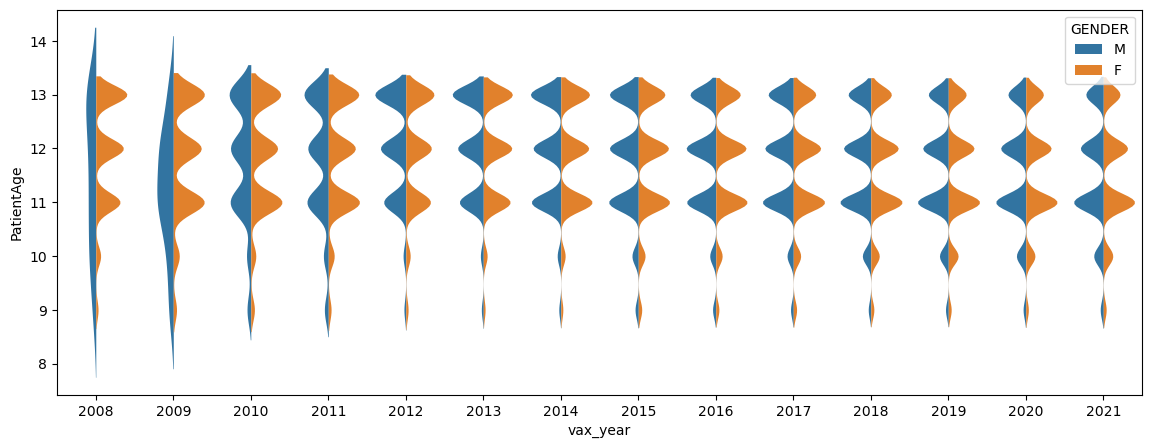

In [133]:
plt.figure(figsize = (14,5))
ax = sns.violinplot(x='vax_year',y = 'PatientAge', hue='GENDER',data = df_913_distinct, split = True, linewidth=0)

In [144]:
df_913_m = df_913_distinct[df_913_distinct['GENDER'] == 'M']
df_913_f = df_913_distinct[df_913_distinct['GENDER'] == 'F']

grouped_m = df_913_m.groupby(['vax_year']).size().reset_index(name='count')
grouped_f = df_913_f.groupby(['vax_year']).size().reset_index(name='count')
grouped_m

,vax_year,count
0,2008,52
1,2009,40
2,2010,1051
3,2011,1920
4,2012,3862
5,2013,6101
6,2014,7189
7,2015,9928
8,2016,11237
9,2017,11451


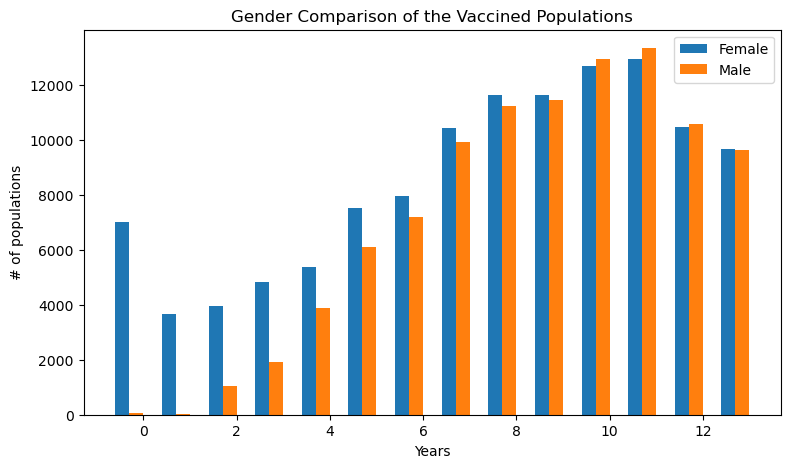

In [148]:


# Position of x-axis values
x_pos = np.arange(len(grouped_m['vax_year']))

# Bar width
bar_width = 0.3


plt.figure(figsize=(9, 5))

# Create the barplot
plt.bar(x_pos - 3*bar_width/2, np.array(grouped_f['count']), bar_width, label='Female')
plt.bar(x_pos - bar_width/2, np.array(grouped_m['count']), bar_width, label='Male')
# plt.bar(x_pos + bar_width/2, bar3_values, bar_width, label='Unknown')

# Customize the plot
plt.xlabel('Years')
plt.ylabel('# of populations')
plt.title('Gender Comparison of the Vaccined Populations')
# plt.xticks(x_pos, x)
# plt.yticks(fontproperties = legend_font)
plt.legend()

# Show the plot
plt.show()


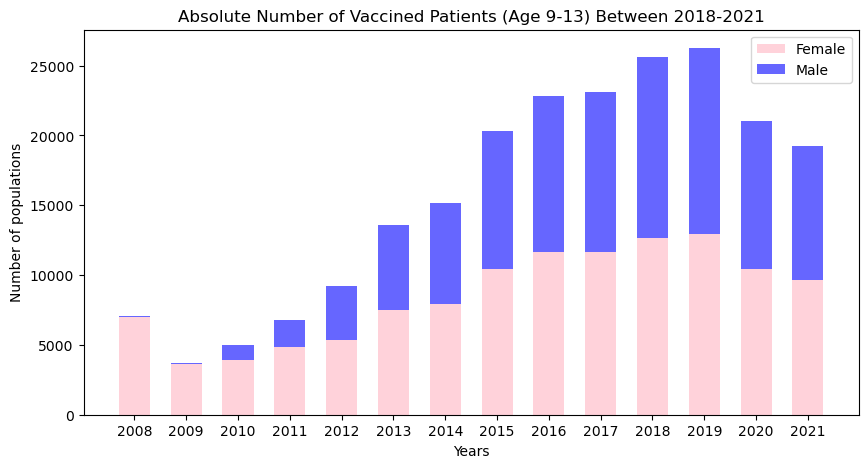

In [151]:

categories = np.array(grouped_f['vax_year'])
values1 = np.array(grouped_f['count'])
values2 = np.array(grouped_m['count'])

x = np.arange(len(categories))

plt.figure(figsize = (10,5))
plt.bar(x, values1,color = 'pink',alpha = 0.7, label='Female', width=0.6)

# 绘制第二个柱状图，将其叠加在第一个上面
plt.bar(x, values2,color = 'blue',alpha = 0.6, label='Male', width=0.6, bottom=values1)

# 添加标签和图例
plt.xlabel('Years')
plt.ylabel('Number of populations')
plt.title('Absolute Number of Vaccined Patients (Age 9-13) Between 2018-2021')
plt.xticks(x, categories)
plt.legend()

# 显示图表
plt.show()


In [ ]:


box_res = [[],[],[],[],[],[],[]]
for i in range(len(ages)):
    box_res[ages[i]-8].append(gaps[i])
len(box_res[0])

# box_clean=cleanforbox(box_res)
# box_clean = box_res

plt.figure(figsize=(10, 6))
sns.violinplot(data=box_clean)

xtick = np.array(list(set(ages)))

# 添加标题和轴标签
plt.title('1st and 2nd gaps within 3 doses schedule study(under 15)')
plt.xticks(xtick-8,xtick)
plt.xlabel('Ages')
plt.ylabel('Months')

In [53]:
df_u14_distinct[df_u14_distinct['Doses'] == 1]

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
10,35786,8,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11010.0,Nassau,Chenango,F,1,NaN,NaN
43,101205,8,2008,BLACK OR AFRICAN-AMERICAN,UNKNOWN,13,Gardasil,11934.0,Suffolk,Ulster,F,1,NaN,NaN
44,103691,5,2008,OTHER,NOT HISPANIC OR LATINO,11,Unspecified,11556.0,Nassau,Orange,M,1,NaN,NaN
51,110763,1,2015,WHITE,UNKNOWN,12,Gardasil,11940.0,Suffolk,Suffolk,F,1,NaN,NaN
60,134367,1,2012,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11021.0,Nassau,Oswego,F,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410761,23571551,7,2020,OTHER,UNKNOWN,12,Gardasil 9,11967.0,Suffolk,New York,F,1,NaN,NaN
410764,23572455,10,2015,OTHER,HISPANIC OR LATINO,12,Gardasil 9,11726.0,Suffolk,Suffolk,F,1,NaN,NaN
410768,23573270,8,2020,WHITE,HISPANIC OR LATINO,13,Gardasil 9,11542.0,Nassau,Nassau,M,1,NaN,NaN
410770,23573674,2,2021,UNKNOWN,UNKNOWN,13,Gardasil 9,11717.0,Suffolk,Suffolk,M,1,NaN,NaN


In [69]:
gaps = np.array(df_u14_distinct['dose12gap'])
df_u14_distinct['dose12gap'].isna()

df_u14_distinct[df_u14_distinct['Doses']==1]

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
10,35786,8,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11010.0,Nassau,Chenango,F,1,NaN,NaN
43,101205,8,2008,BLACK OR AFRICAN-AMERICAN,UNKNOWN,13,Gardasil,11934.0,Suffolk,Ulster,F,1,NaN,NaN
44,103691,5,2008,OTHER,NOT HISPANIC OR LATINO,11,Unspecified,11556.0,Nassau,Orange,M,1,NaN,NaN
51,110763,1,2015,WHITE,UNKNOWN,12,Gardasil,11940.0,Suffolk,Suffolk,F,1,NaN,NaN
60,134367,1,2012,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11021.0,Nassau,Oswego,F,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410761,23571551,7,2020,OTHER,UNKNOWN,12,Gardasil 9,11967.0,Suffolk,New York,F,1,NaN,NaN
410764,23572455,10,2015,OTHER,HISPANIC OR LATINO,12,Gardasil 9,11726.0,Suffolk,Suffolk,F,1,NaN,NaN
410768,23573270,8,2020,WHITE,HISPANIC OR LATINO,13,Gardasil 9,11542.0,Nassau,Nassau,M,1,NaN,NaN
410770,23573674,2,2021,UNKNOWN,UNKNOWN,13,Gardasil 9,11717.0,Suffolk,Suffolk,M,1,NaN,NaN


In [76]:
len(gaps)

272552

In [77]:
sum([67764, 96067, 108694, 27])

272552

In [91]:
df_u14_distinct = df_hpv_distinct[df_hpv_distinct['PatientAge'] <= 14]
df_u14_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
5,28751,12,2016,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M,3,3.0,6.0
7,34816,9,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11950.0,Suffolk,Tioga,M,3,2.0,8.0
9,35656,10,2012,ASIAN,NOT HISPANIC OR LATINO,14,Gardasil,11791.0,Nassau,Nassau,M,2,5.0,5.0
10,35786,8,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11010.0,Nassau,Chenango,F,1,NaN,NaN
13,46635,6,2009,WHITE,NOT HISPANIC OR LATINO,11,Gardasil,11967.0,Suffolk,Chautauqua,F,2,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0,12.0
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0


In [97]:
df_u14_distinct = df_hpv_distinct[df_hpv_distinct['PatientAge'] <= 14]
df_u14_distinct.reset_index(inplace = True)

In [98]:
df_u14_distinct

,index,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
0,5,28751,12,2016,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M,3,3.0,6.0
1,7,34816,9,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11950.0,Suffolk,Tioga,M,3,2.0,8.0
2,9,35656,10,2012,ASIAN,NOT HISPANIC OR LATINO,14,Gardasil,11791.0,Nassau,Nassau,M,2,5.0,5.0
3,10,35786,8,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11010.0,Nassau,Chenango,F,1,NaN,NaN
4,13,46635,6,2009,WHITE,NOT HISPANIC OR LATINO,11,Gardasil,11967.0,Suffolk,Chautauqua,F,2,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272547,410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0
272548,410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0,12.0
272549,410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0
272550,410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0


In [85]:
df_u14_distinct['dose12gap'][0]

TypeError: 'NoneType' object is not subscriptable

In [101]:
df_u14_distinct[df_u14_distinct['Doses'] == 1]

,index,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
3,10,35786,8,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11010.0,Nassau,Chenango,F,1,NaN,NaN
20,43,101205,8,2008,BLACK OR AFRICAN-AMERICAN,UNKNOWN,13,Gardasil,11934.0,Suffolk,Ulster,F,1,NaN,NaN
21,44,103691,5,2008,OTHER,NOT HISPANIC OR LATINO,11,Unspecified,11556.0,Nassau,Orange,M,1,NaN,NaN
26,51,110763,1,2015,WHITE,UNKNOWN,12,Gardasil,11940.0,Suffolk,Suffolk,F,1,NaN,NaN
30,60,134367,1,2012,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11021.0,Nassau,Oswego,F,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272540,410761,23571551,7,2020,OTHER,UNKNOWN,12,Gardasil 9,11967.0,Suffolk,New York,F,1,NaN,NaN
272542,410764,23572455,10,2015,OTHER,HISPANIC OR LATINO,12,Gardasil 9,11726.0,Suffolk,Suffolk,F,1,NaN,NaN
272543,410768,23573270,8,2020,WHITE,HISPANIC OR LATINO,13,Gardasil 9,11542.0,Nassau,Nassau,M,1,NaN,NaN
272544,410770,23573674,2,2021,UNKNOWN,UNKNOWN,13,Gardasil 9,11717.0,Suffolk,Suffolk,M,1,NaN,NaN


,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
5,28751,12,2016,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil 9,11510.0,Nassau,Nassau,M,3,3.0,6.0
7,34816,9,2015,WHITE,NOT HISPANIC OR LATINO,13,Gardasil,11950.0,Suffolk,Tioga,M,3,2.0,8.0
9,35656,10,2012,ASIAN,NOT HISPANIC OR LATINO,14,Gardasil,11791.0,Nassau,Nassau,M,2,5.0,5.0
10,35786,8,2008,WHITE,NOT HISPANIC OR LATINO,12,Gardasil,11010.0,Nassau,Chenango,F,1,NaN,NaN
13,46635,6,2009,WHITE,NOT HISPANIC OR LATINO,11,Gardasil,11967.0,Suffolk,Chautauqua,F,2,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0,12.0
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0


KeyError: 0

In [107]:
isinstance('nan', (int, float))

False

[67791, 96067, 59382, 49312]
[67791, 96067, 59382, 49312]


Text(0.5, 1.0, 'Kids(under 15) Hpv Vaccine Gaps Between 1st and 2nd Dose')

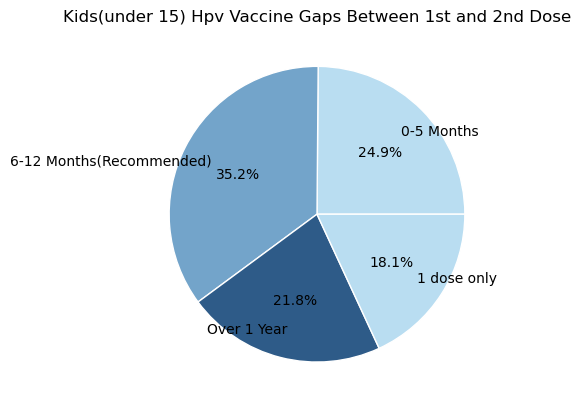

In [117]:
df_u14_distinct = df_hpv_distinct[df_hpv_distinct['PatientAge'] <= 14]
df_u14_distinct.reset_index(inplace = True)



res=[0,0,0,0]
for i in range(len(gaps)):
    if df_u14_distinct['dose12gap'][i]>=0 and df_u14_distinct['dose12gap'][i]<=200:
        if df_u14_distinct['Doses'][i] == 1:
            print(df_u14_distinct['wholeSeriesGap'][i])
        if df_u14_distinct['dose12gap'][i] <= 5:
            res[0] += 1
        elif df_u14_distinct['dose12gap'][i] <= 12:
            res[1] += 1
    #     elif i <= 36:
    #         res[2] += 1
        else:
            res[2] +=1
    else:
        res[3] += 1

print(res)

labels = ["0-5 Months", "6-12 Months(Recommended)", "Over 1 Year","1 dose only"]
value = res
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.8,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Kids(under 15) Hpv Vaccine Gaps Between 1st and 2nd Dose')
# plt.show() 

In [153]:
import pandas as pd
from scipy.stats import pearsonr

df_u14_distinct = df_hpv_distinct[df_hpv_distinct['PatientAge'] <= 14]
df_u14_multipledose = df_u14_distinct[df_u14_distinct['Doses']>1]

column1 = df_u14_multipledose['dose12gap']
column2 = df_u14_multipledose['Doses']

correlation, p_value = pearsonr(column1, column2)

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)


Pearson Correlation Coefficient: -0.5309610751245828
P-value: 0.0


In [163]:
df_u14_2doses = df_u14_distinct[df_u14_distinct['Doses']==2]
df_u14_3doses = df_u14_distinct[df_u14_distinct['Doses']==3]

In [165]:
df_u14_2doses['dose12gap'].mean()

12.77633754018263

In [166]:
df_u14_3doses['dose12gap'].mean()

2.4696716750139123

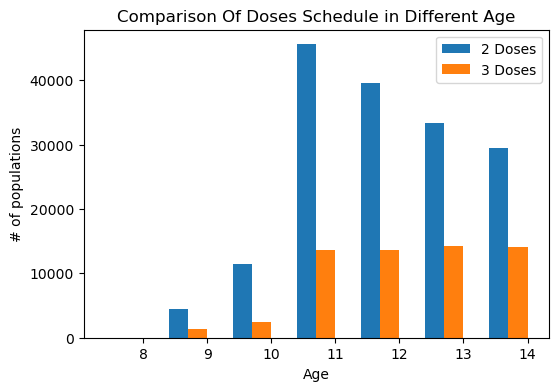

In [179]:
grouped_2 = df_u14_2doses.groupby('PatientAge').size().reset_index(name='count')
grouped_3 = df_u14_3doses.groupby('PatientAge').size().reset_index(name='count')

# Position of x-axis values
x_pos = np.arange(len(grouped_2['PatientAge']))
x = np.array(grouped_2['PatientAge'])
# Bar width
bar_width = 0.3


plt.figure(figsize=(6, 4))

# Create the barplot
plt.bar(x_pos - 3*bar_width/2, np.array(grouped_2['count']), bar_width, label='2 Doses')
plt.bar(x_pos - bar_width/2, np.array(grouped_3['count']), bar_width, label='3 Doses')
# plt.bar(x_pos + bar_width/2, bar3_values, bar_width, label='Unknown')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('# of populations')
plt.title('Comparison Of Doses Schedule in Different Age')
plt.xticks(x_pos,x)
# plt.yticks(fontproperties = legend_font)
plt.legend()

# Show the plot
plt.show()


In [180]:
df_u14_2doses

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER,Doses,dose12gap,wholeSeriesGap
9,35656,10,2012,ASIAN,NOT HISPANIC OR LATINO,14,Gardasil,11791.0,Nassau,Nassau,M,2,5.0,5.0
13,46635,6,2009,WHITE,NOT HISPANIC OR LATINO,11,Gardasil,11967.0,Suffolk,Chautauqua,F,2,13.0,13.0
14,47959,9,2008,OTHER,UNKNOWN,12,Gardasil,11717.0,Suffolk,New York,F,2,13.0,13.0
17,54798,6,2010,WHITE,HISPANIC OR LATINO,11,Gardasil,11727.0,Suffolk,Chautauqua,F,2,51.0,51.0
20,67631,1,2011,BLACK OR AFRICAN-AMERICAN,NOT HISPANIC OR LATINO,11,Gardasil,11722.0,Suffolk,Suffolk,F,2,88.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410773,23573852,8,2016,NATIVE HAWAIIAN OR OTHER PACIFIC,UNKNOWN,12,Gardasil,11790.0,Suffolk,Suffolk,F,2,61.0,61.0
410774,23574078,7,2018,WHITE,HISPANIC OR LATINO,14,Gardasil 9,11786.0,Suffolk,Suffolk,M,2,12.0,12.0
410775,23574745,7,2017,UNKNOWN,UNKNOWN,12,Gardasil 9,11510.0,Nassau,Nassau,F,2,13.0,13.0
410776,23577049,12,2019,WHITE,NOT HISPANIC OR LATINO,12,Unspecified,11791.0,Nassau,Nassau,F,2,6.0,6.0


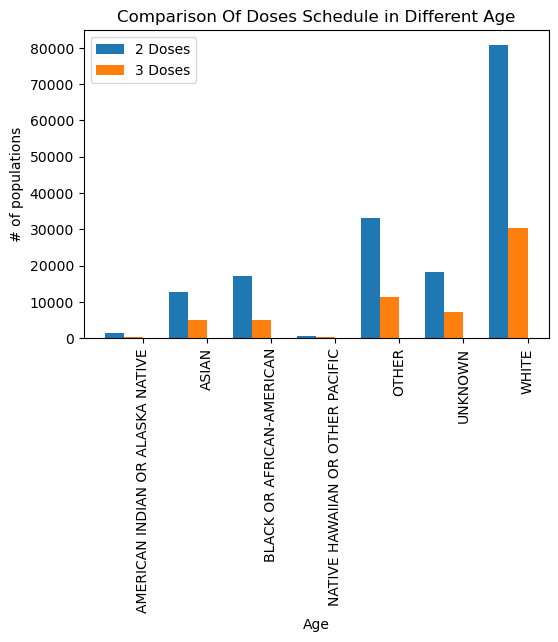

In [183]:
grouped_2 = df_u14_2doses.groupby('RACE_DESC').size().reset_index(name='count')
grouped_3 = df_u14_3doses.groupby('RACE_DESC').size().reset_index(name='count')

# Position of x-axis values
x_pos = np.arange(len(grouped_2['RACE_DESC']))
x = np.array(grouped_2['RACE_DESC'])
# Bar width
bar_width = 0.3


plt.figure(figsize=(6, 4))

# Create the barplot
plt.bar(x_pos - 3*bar_width/2, np.array(grouped_2['count']), bar_width, label='2 Doses')
plt.bar(x_pos - bar_width/2, np.array(grouped_3['count']), bar_width, label='3 Doses')
# plt.bar(x_pos + bar_width/2, bar3_values, bar_width, label='Unknown')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('# of populations')
plt.title('Comparison Of Doses Schedule in Different Age')
plt.xticks(x_pos,x,rotation =90)
# plt.yticks(fontproperties = legend_font)
plt.legend()

# Show the plot
plt.show()